# Subplots

In module one, we talked about principles, which underly good visualizations, we pulled from work by Cairo and Tufty. In Module 2, we opened up the Matplotlib Python Library. Starting with the architecture and working our way through some the most common kinds of plots. Scatter plots, line graphs and bar charts.

In this module, we're going to do a bit deeper and talk about multiple plots with the same figure, interaction, animation and a few more kinds of plots which you might find useful in your data science journey.

Now, if you've been doing these assignments, you've undoubtedly been visiting our course discussion forums, going to stack overflow, and reading the matplotlib API documentation. I want to point you to the Matplotlib mailing list as well is another great resource. There would be resource posted below on how to browse that list. It's pretty common with open source projects to have two mailing lists. One for developers and the other for users. The users place is where most of the question answering happens. But I encourage to you look at the developer archives, too. To get an idea as to what these kind of projects look like behind the scenes.

Let's start this module with a deeper look at subplots. Thus far we have been using a single axis object to plot a single graph or figure. Sometimes it is useful to show two complex plot side by side for the viewer to compare. Matplotlib handles this with a single figure. Let's first set our rendering backend to the notebook backend, then import our pyplot module and NumPy, as we'll need then both.

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

If we look at the subplot documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number. In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and set the first axis to be the current axis.

So, let's create a new figure and then a new subplot with one row and two columns. The first axis object that pyplot will plot against is the left hand side.

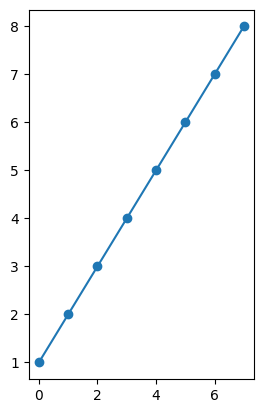

In [2]:
# let's create a new figure
plt.figure()

# and make a subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

# now let's plot some fake linear data
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

 Okay, great we've got a skinny plot on the left hand side. If we made a second call to subplot() we could indicate that we also want to plot on the right hand side.

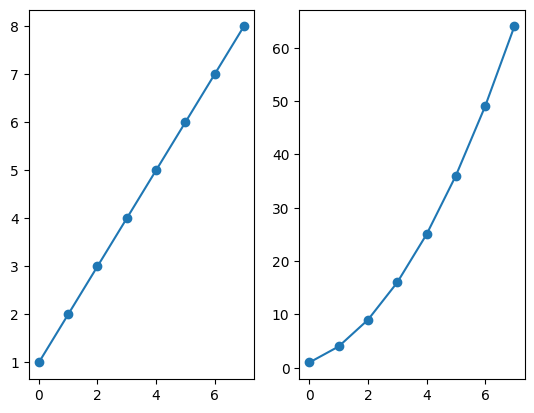

In [3]:
# Our previous data
plt.subplot(1, 2, 1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

# now our new data in the second subplot
plt.subplot(1, 2, 2)
exponential_data = linear_data**2 
plt.plot(exponential_data, '-o')

And that's nice. Now we have two plots, each with their own axis objects. Now the norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. At any time with the parameters that interest you in order to get back a given axis.

Take a look at this figure though, do you notice anything odd about this image thinking of our first week of the course? The two images have different y axes values. This would be a problem and potential mislead the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the share x and share y parameters.

Let's clean this up.

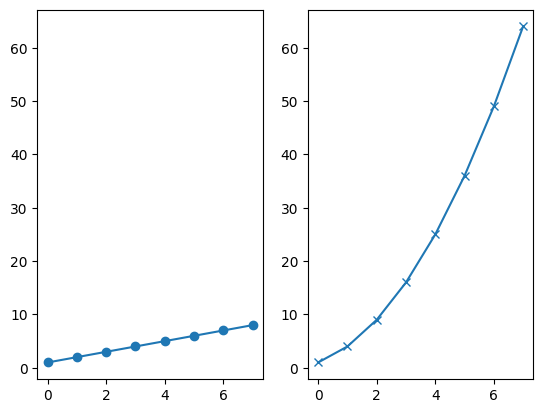

In [4]:
# Let's plot the first figure and get a reference to that axes
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# now let's tell the next plot we want to share the y axes with the
# one from ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

There we go. Two plots side by side and we've locked the y axis.

Now, those of you who have been playing close attention will note that I used the `subplot` function a second time but I didn't pass in three parameters, just one. The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter. Where the hundreds values the first argument, the tens the second argument, and the ones the third argument.

Now, I'm frankly not a big fan of this second syntax -- it feels pretty hacky and it really only saves typing two commas and yet limits us to single digit. Computer science folks might feel a little twitch inside like something's wrong with this notation, and I'll say that it certainly bugged me the first few times I saw it. But I wanted you to be aware of it so you would be able to read it when you come across it in the docs.

An important fact to remember is that the plot location in the matrix of items is index starting at one and not at zero, as would be the convention if you were using something like NumPy. So if you're iterating through a matrix or list, create subplots, remember to start at position plus one.

Now, there's a nice function called subplots, note the plural, which allows you to get many axis objects at once, and I think this is great. So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this.

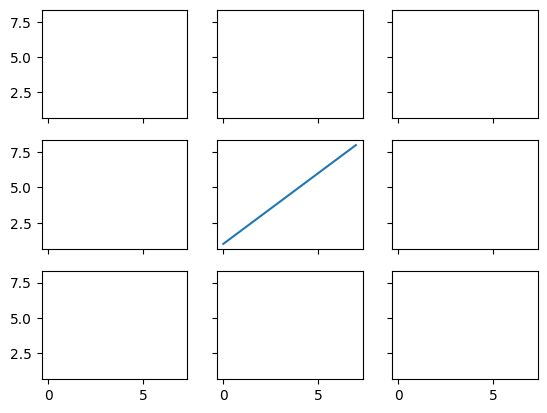

In [9]:
# create a 3x3 grid of subplots, using tuple unpacking
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The syntax looks a little goofy maybe since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis. The results however look really nice, but note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure.

Of course, we can just iterate through a list and plot one plot at a time, we don't have to store a reference to each axes.

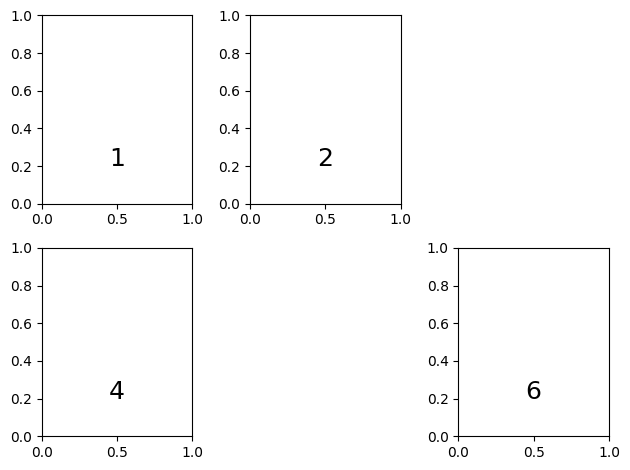

In [21]:
# So, let's create a basic figure
fig = plt.gcf()
# Now let's iterate over 6 potential spots in our figure. I'm going to create a plot with 2 rows and 3 columns
for i in range(1, 7):
    # let's not plot something if we are at position 5 or 3, we'll leave these as holes just to see what happens
    if i != 5 and i != 3:
        # Now let's add a subplot, we specify the first two arguments as the structure we are expecting the 
        # figure to take, so 2 rows and 3 columns, and the third argument is the position of this item in the 
        # figure, in this case i. 
        # While we are iterating linearly this is mapped onto our 2x3 row/column space, so the
        # numbering goes from left to right and top to bottom
        ax = fig.add_subplot(2, 3, i)
        # And we'll just add some text to the figures to make it more clear which item went where.
        # Remember from the lecture on annotation that text goes at the bottom left corner by default, 
        # and we are using relative positioning
        ax.text(0.5, 0.2, str((i)),fontsize=18, ha='center')
        
plt.tight_layout()

## SPLOMS

So, we now understand why there are abstractions of Axes in a figure, because a figure might have several
Axes objects which show multiple views of data. A common data science visual exploration technique is called
the SPLOM, which stands for scatterplot matrices. These are particularly useful for getting the relationship
between a number of different variables from a quick glance. Now, a SPLOM is actually similar to what
Edward Tufte called a "small multiple" -- a set of visuals that look at related data but that slice that
data into different small visuals so you can see both the trees and the forest at once.

Let's take a look, I'm going to use some data from the iris dataset

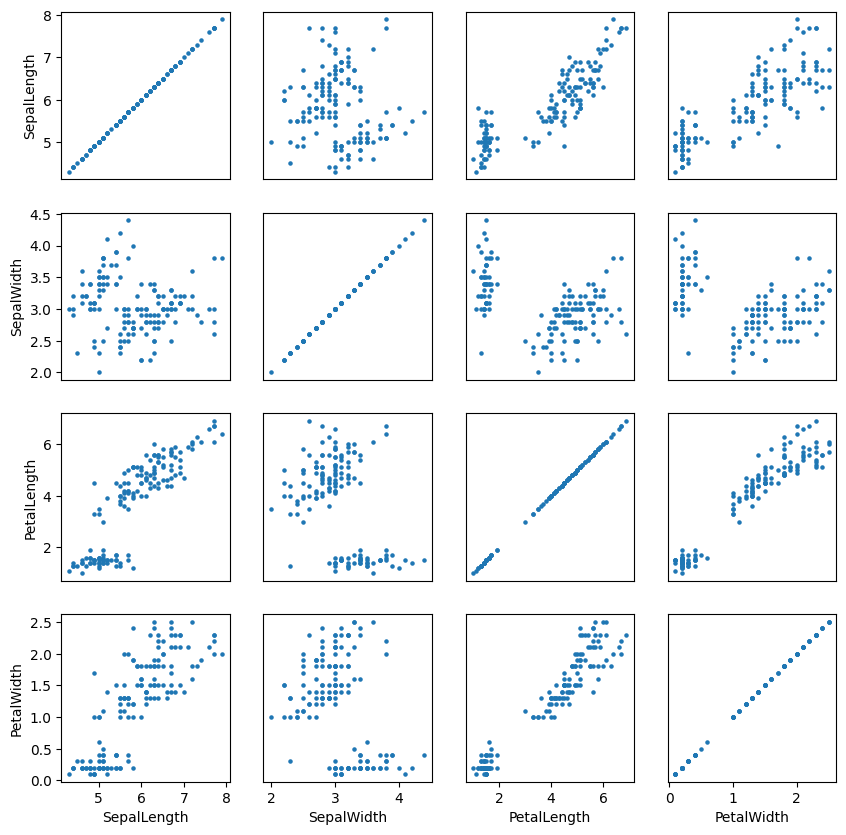

In [23]:
# Let's first capture a list of the variables we are interested in
import pandas as pd
df=pd.read_csv("resource/iris.csv")
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Now we need to create a grid of subplots of size width and height equal to the number of different variables
# we want to explore, in this case that's a 4x4 grid
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# Now we want to iterate across each column in our dataframe and compare it to each other column in our
# DataFrame. We'll do this with a couple of nested for loops
for i in range(len(cols)):
    for j in range(len(cols)):
        # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
        # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
        # just to make things a bit more clear
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)

        # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
        # labels, so let's turn those off
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        # Then we'll turn them back on only if we are the last row...
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and similarly, only show the y-axis labels for the first column.
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

# Now let's take a look at our data!

Okay, great! We have a nice example of a SPLOM, and we can easily compare the length and width of sepals and pedals. and look for trends at a glance. One that jumps out to me is that the petal width, the bottom row, has a pretty linear relationship with the petal length, the third scatter plot over. This doesn't seem to be true if you compared the sepalwidth to the sepal length, by looking at the second row and the first column cell.

In the next module, I want to exploit our new knowledge of subplots while introducing you to pretty fundamental data science chart, the histogram.

# Histograms

A histogram is a bar chart which shows the frequency of a given phenomena.

A great example are probability distributions. For instance, in the first course in this specialization, we touched on the difference between the random, uniform, normal, and chi squared distributions.

Probability functions can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur.

The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution. Let's quit talking about this and do a bit of coding to see it in action.

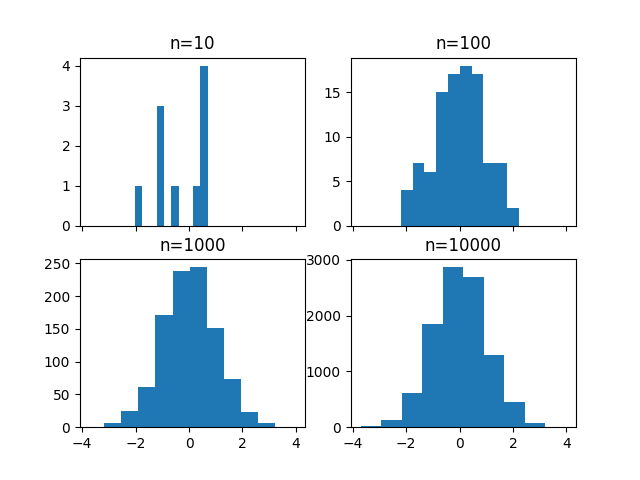

In [5]:
# I'm going to bring in matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Let's pull some samples from the normal distribution and plot four different histograms as subplots. First I'll 
# create our 2 x 2 grid of axis objects. In this case, we don't want to share the y-axis between the plots since 
# we're intentionally looking at a number of different sizes of samples.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# We're mostly interested in how uniform the distribution looks. Then we can iterate through a list of four 
# different values, 10, 100, 1,000 and 10,000. And we'll pull samples from the NumPy. Remember that the normal 
# function of random just creates a list of numbers based on the underlying normal distribution.

# So iterate through each axis
for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Well, there we go. The first plot only has ten samples, so it looks pretty jagged. And in my version here I don't think anyone would say this is obviously a normal distribution. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples.

But if we look closely, we can see that the bar of the 10,000 plots are actually wider than those of the 10 or the 100 plot. What's going on here?

By default, the histogram in Matplotlib uses ten bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin. Let's do the same function with the bin set to 100

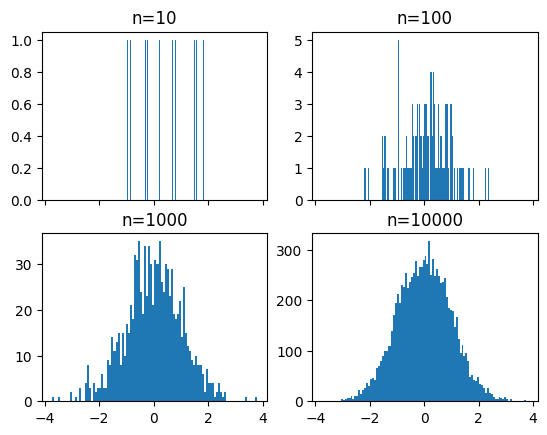

In [28]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample, bins=100)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin.

So I think this brings up an important question of how many bins you should plot when using a histogram. I'm afraid that the answer isn't really clear. Both of these plots are true, one is a visual of the data at a coarse granularity, and one at a more fine grain granularity. When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. This is similar to using aggregate statistics like the mean in standard deviation to describe a sample of a population. These values are coarse and whether they are appropriate depends highly on your questions and interests.

I want to use our newfound knowledge of histograms and subplots to introduce you to a more flexible GridSpec layout for subplots. The GridSpec allows you to map axes over multiple cells in a grid.

For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution.

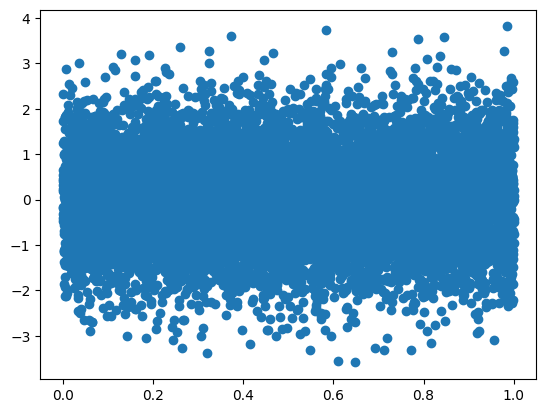

In [35]:
# Just a bunch of random data being created here
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y);

It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear. Let's dive right in -- I'm going to define a 3x3 grid, nine cells in total. I want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side. The original scatter plot can take up a two by two square in the bottom right.

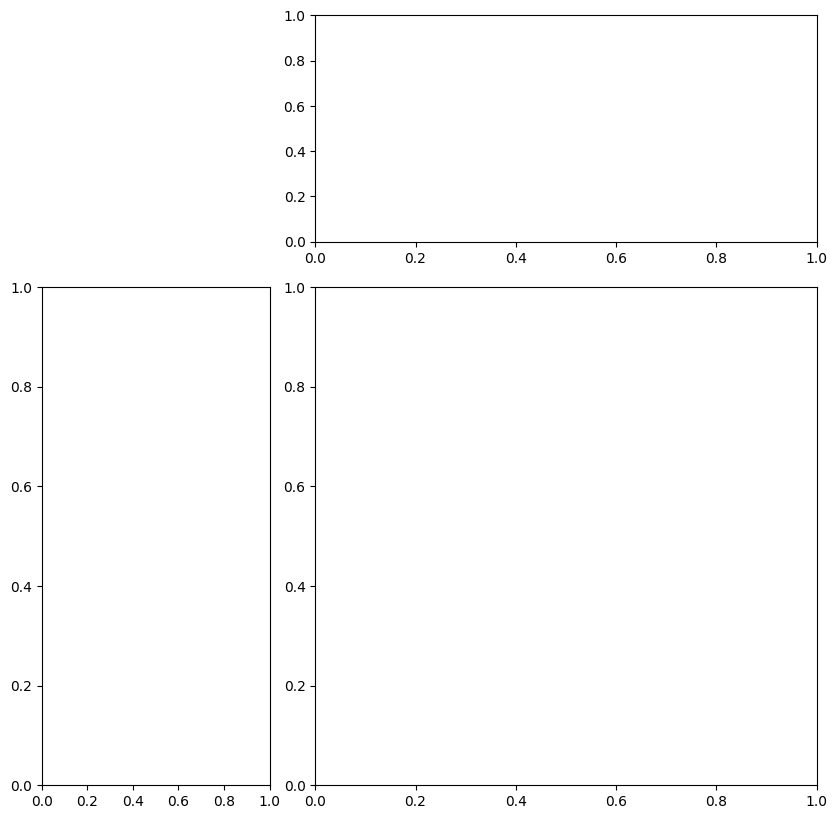

In [36]:
# To use the GridSpec, we first import it, then create a new GridSpec of the overall shape that we want.
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# When we add new items with the subplot, instead of specifying the three numbers of row, column and position, 
# we pass in the elements of the GridSpec object which we wish to cover. And very important here. Because 
# we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use 
# slicing for the beginning or ends of lists.

# The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. So we'll 
# create the first subplot and histogram in row 0, covering off the first element, the middle position, 
# and going to the end of the row.
top_histogram = plt.subplot(gspec[0, 1:])

# We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to 
# the 0 column.
side_histogram = plt.subplot(gspec[1:, 0])

# Finally we'll create the scatter plot in the lower_right. When we execute this, we see our basic set of 
# plots, great.
lower_right = plt.subplot(gspec[1:, 1:])

Now, let's fill this with some data. First the scatter plot, then the top histogram, which is for the x values, then the side histogram for the y values.

And we want the side histogram to be lined up, so let's rotate the layout by setting the orientation. There are actually a few ways of doing this, but since it's so common, Matplotlib has an orientation parameter which we can set to horizontal.

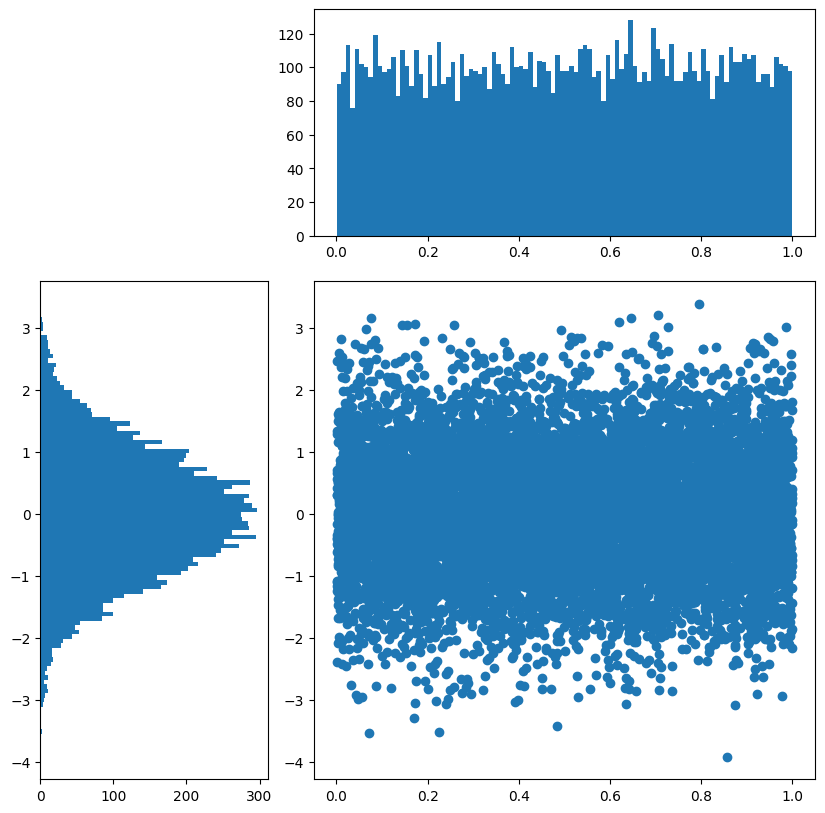

In [37]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

It becomes immediately clear that we have two different distributions! Now we don't really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. Since these are probability density histograms, we care only about the relative values, and in matplotlib we can do this be indicating that our histograms are `density=True`. We can also invert the xaxis subplot for the histogram on the left hand side, which makes is (perhaps) more clear that it represents the data in the right hand side. We do this directly using the `invert_xaxis` function on the axis. Finally, we can see that our axes have a bit of whitespace padding on the left and right which seems unneccessary. So we can get rid of this by changing our axes limits.

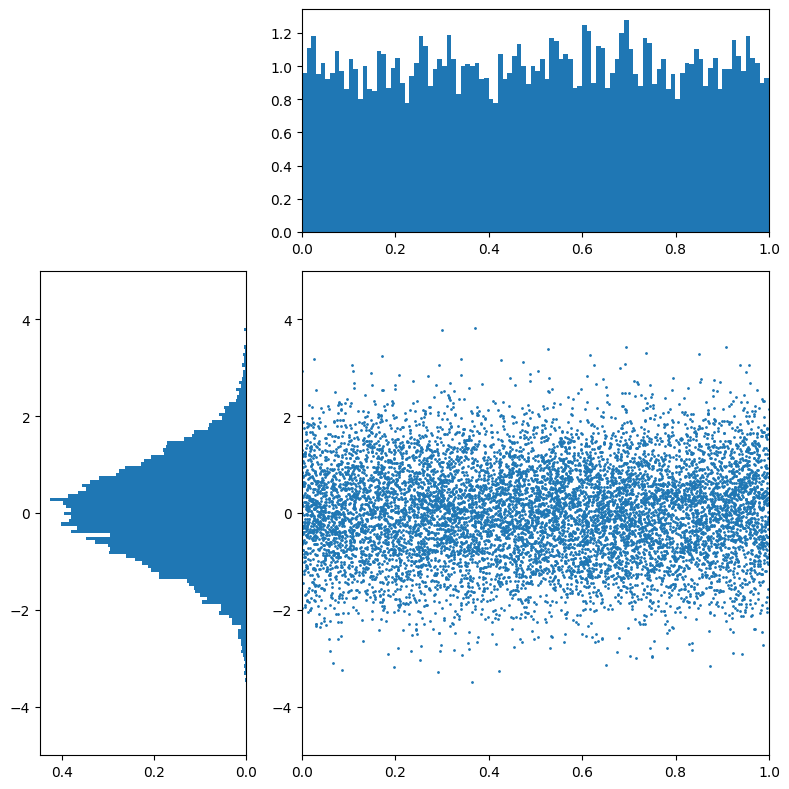

In [51]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(8,8))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot, making it clear this is a density function
lower_right.scatter(X, Y, s=1)
#lower_right.get_yaxis().set_visible(False)
top_histogram.hist(X, bins=100,  density=True)
#top_histogram.get_xaxis().set_visible(False)
side_histogram.hist(Y, bins=100, orientation='horizontal',  density=True);

# Flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)
    
plt.tight_layout()

And there we go. We can see that our top histogram is random, pretty uniform, and that the histogram for the y values indeed looks like the normal distribution.

In fact, this image looks sort of crudely like the image we looked at in the first module of this course, from the MIT and Harvard study on MOOC engagement. And it should be pretty clear to you now how we might adjust various aspects of this plot so that if we wanted to look even more like that engagement image, we could. Actually, why don't you try it? Do you think you could add titles to these subplots, that are similar to the one from the MIT and Harvard publication? Or change the individual point sizes because we're dealing with big data? How about the styling, could you change the colors of the plots to mimic the one from MIT and Harvard? Give your new found matplotlib skills a try.

# Box and Whisker Plots

A box plot, sometimes called a box-and-whisker plot, is a method of showing aggregate statistics of various samples in a concise matter. The goal of the boxplot is to summarize the distribution of your data through a visualization of what's called the 5-number-summary: the extremes - often the minimum and maximum values, the center, usually the median of the data, and the first and third quartiles of your the data. The quartiles of your data break it into four roughly similar sized buckets, and so the first and third quartile markers -- sometimes called hinges -- show you the middle 50% of your data. Through the box plot we can get a sense of the weighting of the data in a fairly compact visual representation. Let's take a look.

In [52]:
# First we'll bring in our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Now let's create three different samples from NumPy - One for the normal distribution,
# one for random, and one from a gamma distribution. 

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Next, let's put those in a pandas DataFrame.
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,0.035123,0.549674,3.535406
1,-1.252272,0.778683,0.535539
2,0.636484,0.634869,1.681547
3,-0.606015,0.461681,2.721685
4,1.863033,0.962644,5.138066
...,...,...,...
9995,-1.900607,0.450041,0.885688
9996,0.890791,0.408273,0.311586
9997,0.339639,0.007362,2.364561
9998,-0.587144,0.207425,3.052196


In [53]:
# Now we can use the pandas describe function to see some summary statistics about our data frame.
# Each row has 10,000 entries. The mean values and standard deviation vary heavily.
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.005237,0.505966,2.008438
std,1.002379,0.290445,1.403937
min,-4.156955,0.000146,0.004754
25%,-0.676864,0.254263,0.968393
50%,-0.013345,0.507119,1.697242
75%,0.669800,0.758608,2.723567
max,3.660895,0.999897,12.586094


This function shows the minimal and maximum values and three three different percentage values. These percentage values make up what's called the interquartile range. There are four different quarters of the data. The first is between the minimal value and the first 25% of the data. And this value of 25% is called the first quartile. The second quarter of data is between the 25% mark and the 50% of the data. The third between 50 and 75% of the data. And 75% mark is called the third quartile. And the final piece of data is between the 75% and the maximum of the data.

Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines are then drawn out to the minimum and maximum values.

{'whiskers': [<matplotlib.lines.Line2D at 0x14e7c1c60>,
 'caps': [<matplotlib.lines.Line2D at 0x14f5c0df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f5c1cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x14f008790>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f00a3e0>],
 'means': []}

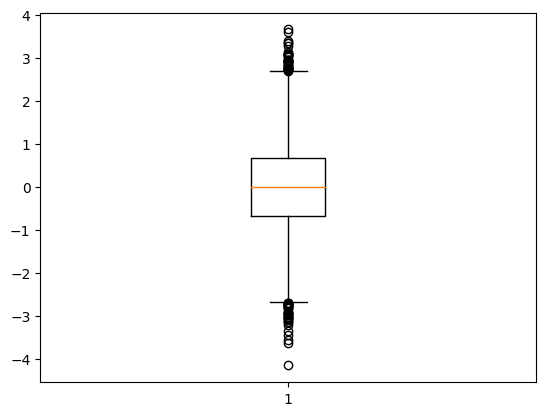

In [56]:
# To see a boxplot we just choose the column of the dataframe we are interested in and pass it
# to pyplot's boxplot function. matplotlib uses numpy arrays for data, but since pandas is built
# on top of numpy things work fluidly
plt.boxplot(df['normal'])

You'll see that matplotlib actually prints out a bunch of information about artists. Often we don't really want to see this, but it can be handy at times. To supress this we simply put a semicolon at the end of our last statement. This is a Jupyter notebook trick that I've actually used a few times and haven't told you about -- it supresses printing the last variable in a cell. Be warned, it's not standard python!

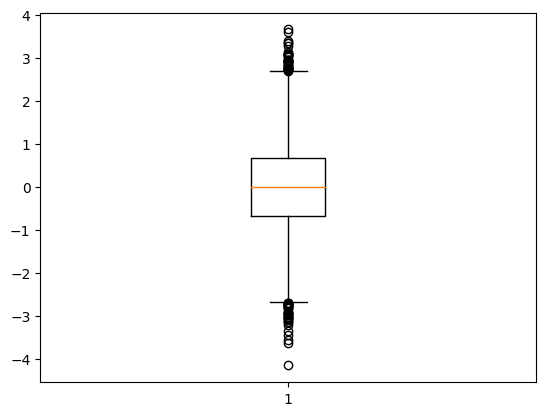

In [55]:
# Now just the image
plt.boxplot(df['normal']);

Great, this gives us a basic box plot. Now let's add the other two samples to it. Unfortunately we can't just pass a whole pandas data frame to matplotlib. Instead we need to pull out each column and send them in as a list of values. 

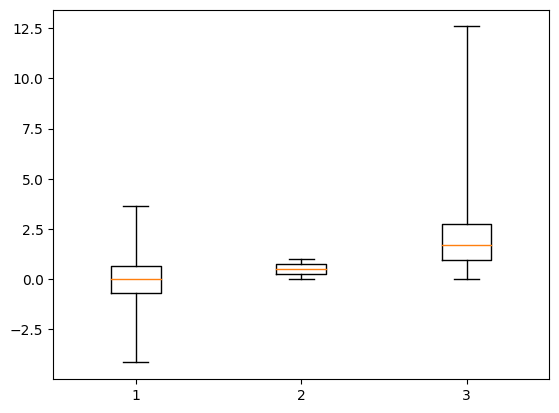

In [66]:
# plot boxplots for all three of df's columns
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100]);

All right, that gives us our three distributions. Now, we didn't normalize the scale, so that's a little wonky. But if we look at the gamma distribution, for instance, we see the tail of it is very, very long. So the maximum values are very far out. Let's take a look at this by itself in a histogram.

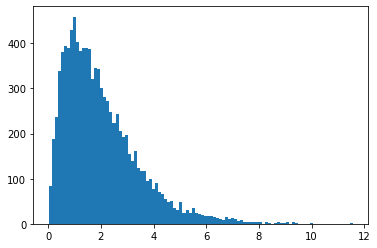

In [6]:
plt.hist(df['gamma'], bins=100);

Interesting, we see it starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail. Let's add this to our box plot, and I'm going to take this as an opportunity to demonstrate something called **inset axes**.

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one axes object. We can actually overlay an axes on top of another within a figure. We do this by calling the `inset_axes` function on the figure and sending in details of the new axes that we want to create. The details we send are a position in x/y space and the width and height of the new plot.

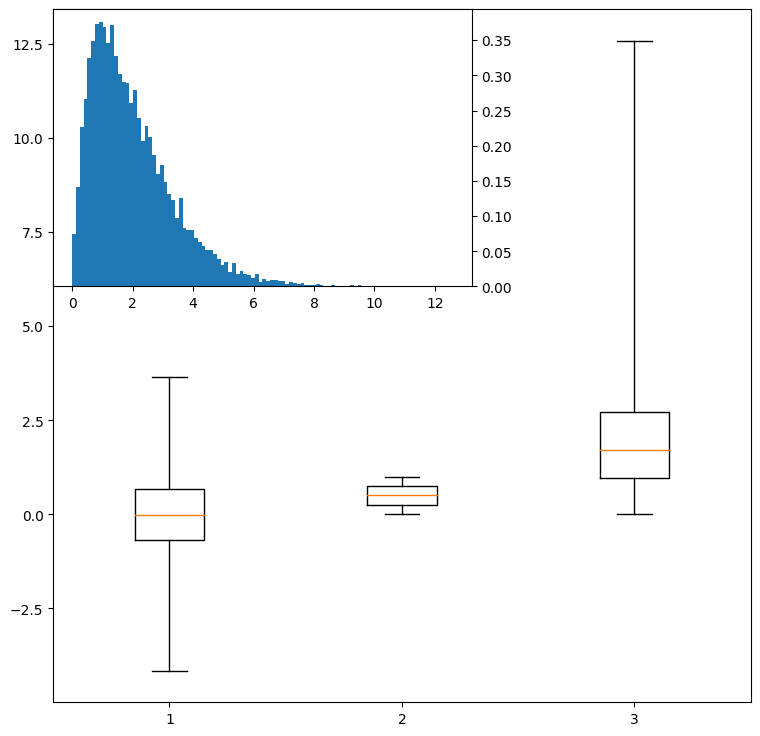

In [80]:
plt.figure(figsize=(9,9))
# Our main figure is our boxplot
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0, 100])
# Now let's plot on that axes a new axes object! This will be overlayed on
# top, and we provide a bounding box of (0,0.6) as the bottom left, and 
# (0.6,0.4) as width and height. These are ratios of the ax object
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])
# Now we can just plot our histogram right on there
ax2.hist(df['gamma'], bins=100, density=True)
# And since the histogram will have tick labels on the left and clash with
# the main figure, we can flip them to the right
ax2.yaxis.tick_right();

Pretty cool, isn't it? So in one figure here we have our boxplots of three distributions, and then we have a nice little inset image showing the histogram of the far right boxplot.

Remember again that each boxplot is our five number summary -- a median line in red in the middle, then two boxes on either side of that which represent 25% of the population respectively, then whiskers which run out to the maximum and minimums of the data. This would be a great time to pause the video and play with the notebook, to clean up this figure by adding titles, legends, and the like. How would you make it clear to the reader that the inset histogram is about the boxplot on the far right, for instance?

Now, we often want to look at a boxplot not by seeing the maximum and minimum values but instead by emphasizing outliers. 
How outliers are detected really depends, and there are various mechanisms to determine whether an observation is an outlier or not. If we look at the documentation though, the default for matplotlib is that outliers are all data points which are either greater than or less than the distance between the hinge (the bottom or top of the box, or first and third quartile), and 1.5 * the inter-quartile range (IQR). The interquartile range is the distance between the two hinges, which captures 50% of our data. So if we omit the `whis` parameter to the boxplot call we'll see the outliers using this method plotted.

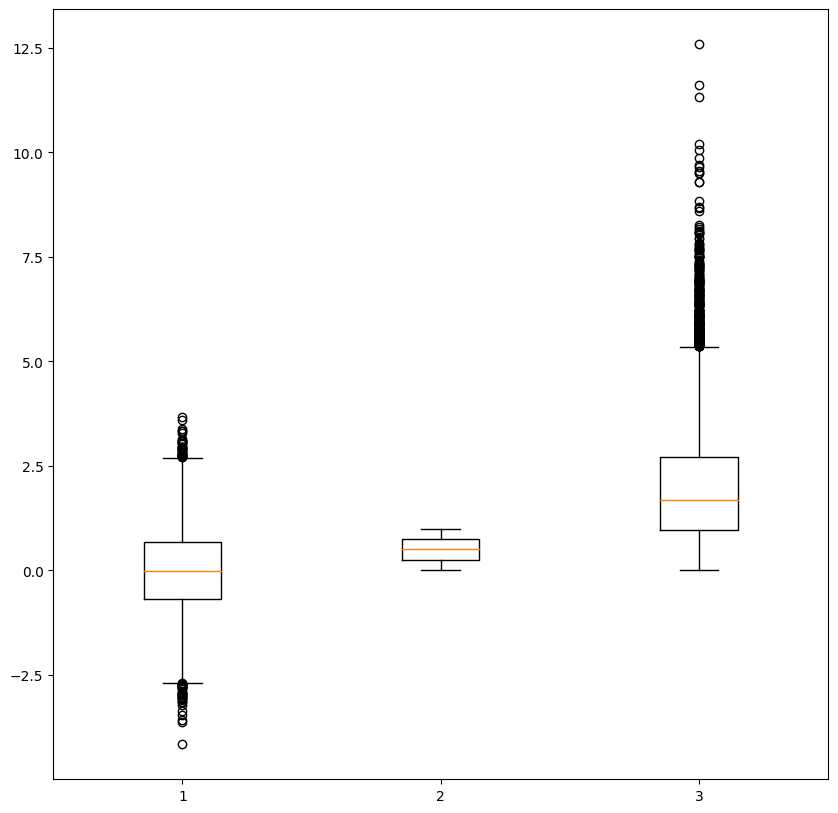

In [81]:
# Nice big figure
plt.figure(figsize=(10,10))
# Now with outliers
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

Each circle in the boxplot is a single outlier observation. The box plot is one of the more common plots that you might use as a data scientist, and matplotlib has significant support for different kinds of box plots. Here the matplotlib documentation is key. You can find links in the course resources to the API, which describes the box plot functionality.

I've got one more plot to show you this week - a two dimensional histogram which is better known as a heat map. Then we'll look at a couple more advance features of matplotlib.

# Heatmaps

Heatmaps are a way to visualize three-dimensions of data and to take advantage of spatial proximity of those dimensions.

In making revisions to this course I was really tempted to get rid of the section on heatmaps, as I've seen enough bad heatmaps to last me a lifetime. The problem is heatmaps are really quite powerful when you have the right data. Weather data is a great example. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity.

In fact, anything with a two dimensional spatial aspect can make for a natural heat map. As an example, eye fixation points through gaze detection is used regularly by researchers and marketing experts to understand what people are looking at on websites. But where heatmaps break down is when there's no continuous - or at least ordinal - relationship between dimensions. Using a heatmap for categorical data, for instance, is just plain wrong. It misleads the viewer into looking for patterns and ordering through spatial proximity. And any such patterns would be purely spurious.

But I decided to keep this in the course, because it can be useful, and I've put together a new example using ordered data, so let's talk about the techniques. In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation.


In [82]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [83]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("resource/NYC hourly traffic.csv")

# I'm going to convert the date column into a date and time
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [111]:
# That might take a bit to load if you are following along on Coursera, it's a big 
# dataset. Let's pare it down in size and do some basic exploratory data analysis 
# with histograms. Let's say I'm interested in a single plaza (camera location) and 
# dates for the early part of 2017. I'm going to write a pandas query to do that
sample=df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-12-30'").copy()
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


This syntax might look a bit different to you from our first course. This is an alternative way to query a dataframe, and it uses a library called `numexpr` to take a query as a string and apply it to the dataframe. It's a bit like SQL in its syntax, if you are familiar with that, but it has a lot of caveats with it. I wanted to expose you to it so you were aware, but it's completely possible for you to use the regular boolean masking method I showed you in course 1. Now would be a great time to pause the video, open the notebook, and see if you could re-write this query using the knowledge you already have on boolean masking.

We have the hour of day here, so let's take a look at a histogram of activity over a day.

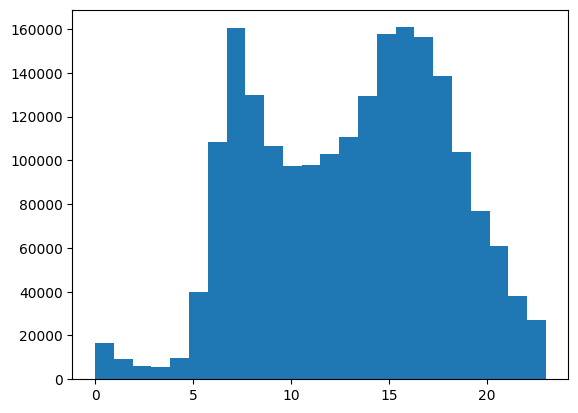

In [103]:
# since we have 24 hours in a day I'll set the bins there, and I want
# to see our frequency -- the weights for each bin -- as the number of
# vehicles which have the E-ZPass system. This system automatically bills
# drivers for using the road, and has already been aggregated (summed)
# for us from individual observations
plt.hist(sample["Hour"],bins=24,weights=sample["# Vehicles - E-ZPass"]);

Ok, what do you notice here? I see two spikes, mornings around 7:30 and afternoons starting at about 3 until 6. Sounds like rush hour!

In this example our hours are ordered, so it makes sense to view the data in this way. But we also have days of the week which are ordered. Let's extract the day of the week and look at a histogram of that.

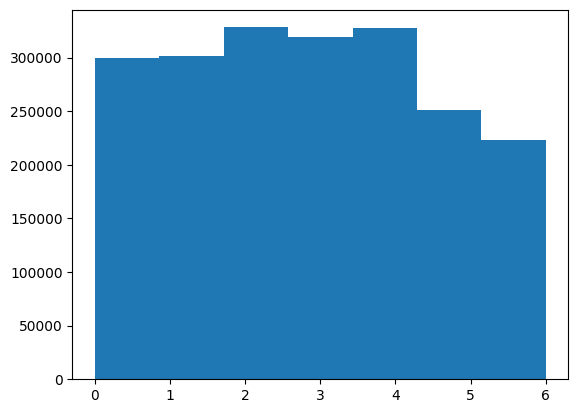

In [104]:
# We can extract the day of the week from the Date column using the
# pandas date time features. The Series object in pandas has an
# attribute "dt" which stores numerous date time transformations for
# us because it's such a common need. In this case we just take the
# Date column (which is a Series object) and get the .dt.dayofweek
# from it.
sample["Day of Week"]=sample["Date"].dt.dayofweek

# Once we have done that we can just look at a histogram
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

Ok, so we can see that traffic flow is pretty steady except for days 5 and 6 in the week, which happen to be the weekends. Now, we could isolate those days and look at the individual histograms for hourly traffic, but we can also look at a joint histogram -- or a heat map -- for both the hourly and daily variables. When we do this we set one variable to be the x axis, another to be the y axis, and then we render our frequency (our weights) as different colors showing the third dimension.

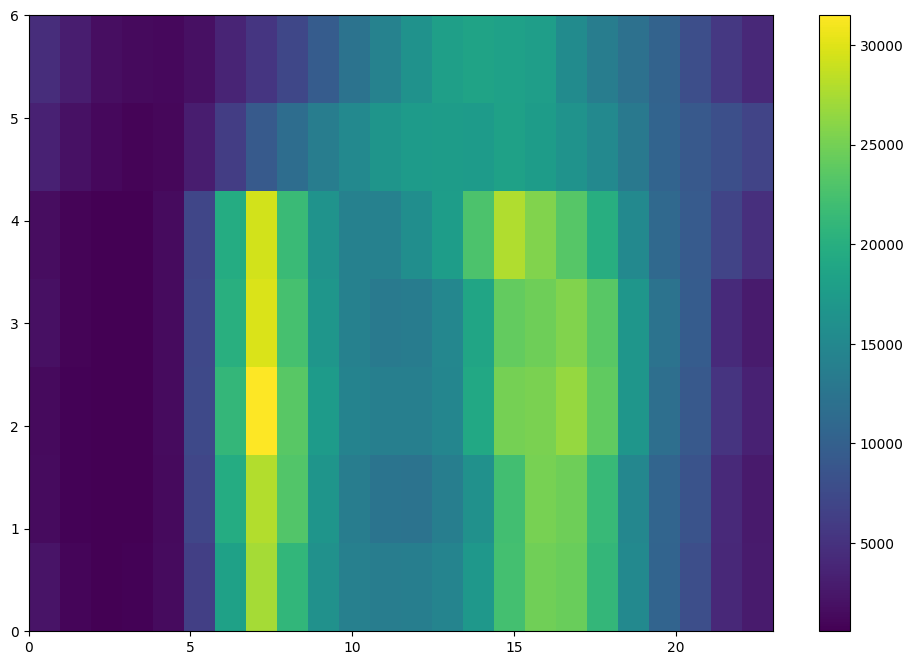

In [105]:
# While it sounds like a lot of work, it isn't really in matplotlib!
# The API looks almost the same as a regular histogram, but in this
# case we have to specify the bin size for each axis
plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();

Great! So lets disect this. First, we see that across all days (our y axis) the first four or so hours of the day are dark blue (this is the first four columns or so), indicating relatively little traffic. Then we see that for the days 0 through 4 we get a spike in traffic, shown as more yellow intensity cells in the image, but this isn't really true for the last two days of the week (the weekend - the top two rows).

Time data is an interesting case for using heat maps, because we often have cycles of activity within a time period -- in this case weeks -- and that allows us to have two ordered dimensions.

Now would be a good time for you to grab control and see if you could look at a different dimension -- months. Could you plot a heat map where one axis is months and the other is, say, week of the month?

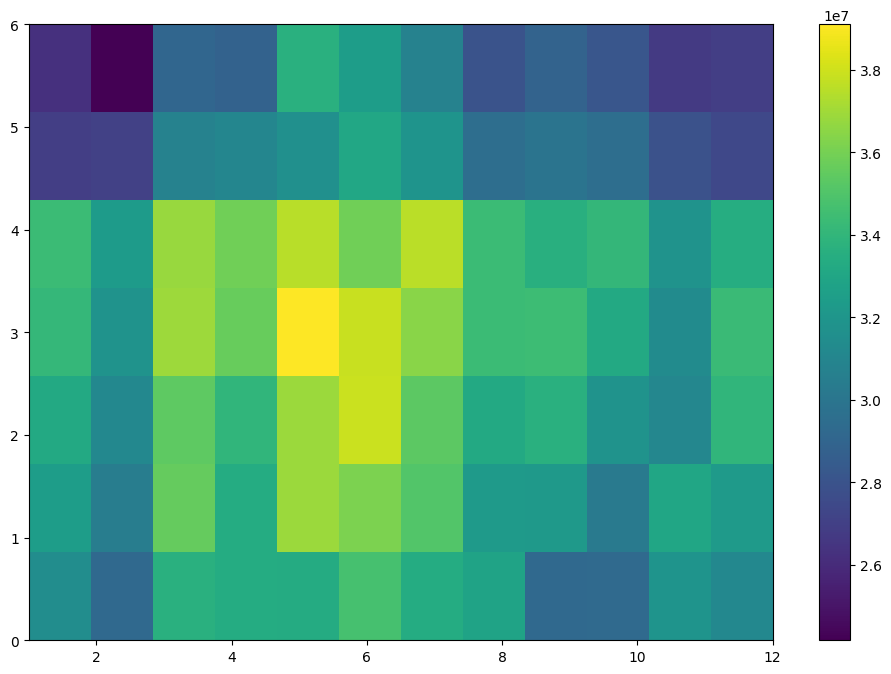

In [112]:
df["Month"]=df["Date"].dt.month
df["Day of Week"]=df["Date"].dt.dayofweek

plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(df["Month"],
           df["Day of Week"],
           bins=[12,7],
           weights=df["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();

# Animation

So far we focused on static images, but matplotlib does have some support for animation. This requires a separate library to use in the Jupyter notebook called `ipympl`, and I've installed that for you here. Animation depends on this library because it provides a new backend for us, call the `widget` backend. Let's turn that on here.

In [24]:
%matplotlib widget

# We can bring in some other libraries we will need too, including the 
# matplotlib animation module
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

The Maplotlib.animation module contains important helpers for building animations, and for our discussion today the important object we are going to use is called `FuncAnimation`. This builds an animation by iteratively calling a function which you define. This function's job is to clear the axis object and redraw the next frame of the animation. Then these frames are all stacked together into a playable video.

I like to use this demonstration in my classes here at Michigan to show students how distributions can be sampled from. So we're going to build a basic animation which is going to pull 100 samples out of the normal distribution. Let's generate that data now.

In [2]:
n = 100
x = np.random.randn(n)

Okay, next we want to actually create a function which will do the plotting. We'll call this function `update`. Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this is as the index into our array values, which we called `x`.

The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the stop object on the event source object attached to the FuncAnimation object.

In [3]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    
    # What is a? Well, it's an object that we'll define in a bit, and it will
    # sit outside of this function but we can still access it since python allows
    # us to access variables in the global scope.
    
    # Now on to the work. First thing we want to do is clear the current axes.
    # We can do this with plt.cla().
    plt.cla()
    
    # Now I jut want to plot a histogram. I'm going to set my bins to a predictable
    # value so it doesn't jump around, but you can play with this
    bins = np.arange(-4, 4, 0.5)
    
    # Then we just make the hist() using the current frame number which was passed
    # into the function and our global values array
    plt.hist(x[:curr], bins=bins)
    
    # Set the axes limits
    plt.axis([-4,4,0,30])
    
    # And add some nice labels throughout
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

Now most of our hard work is done so we just have to view it. To do this, we just generate a new figure, then call the FuncAnimation constructor and we'll assign this to variable a, since we need this for our `update()` function which will stop the animation at the end. The first parameter is the figure that we're working with. This isn't so important here, since we're using the pylot scripting interface to manage the figure. Then the name of our function and then the amount of time we want between updates. Let's set this to 100 milliseconds.

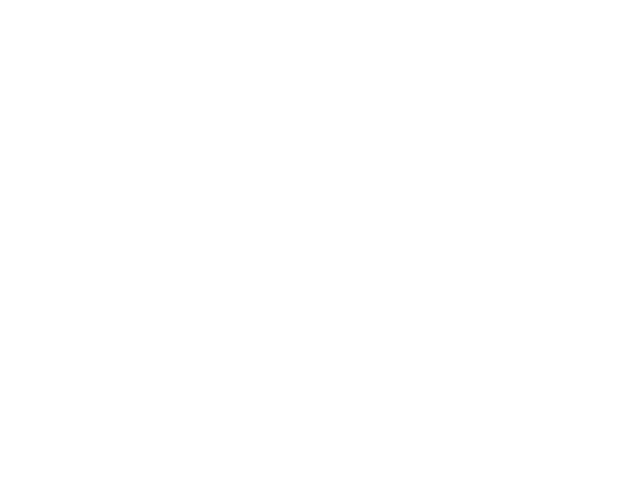

In [4]:
# Quick to start
a = animation.FuncAnimation(plt.figure(), update, interval=100)

# Now tell the widget back end it's time to show!
plt.show()

There we go. A nice example of how sampling from a distribution an be used with an animation.

FuncAnimation like most of the other classes in the animation package is a subclass of the animation object. The animation object has a handy safe function, which allows you to write the animation to a file. This requires additional third party library such as FFMpeg which can take a bit to install and set up. But the result is that you can fairly easily export your animations directly from the Jupiter Web programming environment. 

You know, a figure animation with four sub-plots, one for each kind of distribution we might be interested in understanding could be pretty neat to see. We could plot the samples for the normal distribution in one, for a gamma distribution in another, and then maybe a couple of paramaterized distributions like the normal distribution with different levels of standard deviation. This would be a great way to practice the skills that you've learned in this module, as it would require that you manage multiple sub-plots within an animation using histograms. If you want to tackle that challenge, I'll put a link in the course shell to an optional practice notebook for you to look at.

# Widget Demonstration
This lecture is a bit different, it's an extended topic that looks at the interactive functionality which is available within Jupyter. Jupyter has a notion of widgets, which allow you to build simple dashboards within notebooks to aid in your investigation. You can read more about the Jupyter widgets here, and please keep in mind that while everything I'm showing should work fine in your coursera system, it's quite likely that this fast moving world is already a bit out of date with the very latest!: https://ipywidgets.readthedocs.io/en/latest/

In [27]:
# We'll be using the interact function which comes as a decorator in python.
from ipywidgets import interact
import ipywidgets as widgets

# Now, we're going to look at a small dataset which I collected of my biking data
import pandas as pd
import matplotlib.pyplot as plt

# The dataset is actually pretty important to me, because while I was biking in 2019
# I went into a roundabout - a traffic circle - a little too fast and completely wiped
# out. This makes it a great thing to visualize!
df=pd.read_csv("resource/wipeout.csv")
df=df.set_index(pd.to_datetime(df["timestamp"]))
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
timestamp,,,,,,,,,,,,,
2019-11-01 20:12:03,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
2019-11-01 20:12:04,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2019-11-01 20:12:07,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
2019-11-01 20:12:08,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
2019-11-01 20:12:10,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


The dataset is made up of time and a set of sensors I was wearing while I was riding. These sensors picked up details such as my position and elevation, my speed, my heart rate, and more. I assume everyone goes for a bike ride like this.

In [28]:
# Pandas has some build in support for plotting, but needs to be able to "talk" matplotlib.
# We do this by indicating that we want our pandas plots to convert automatically for us
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [29]:
# Not all of the columns in my dataframe are good to visualize in a line plot. So I'm going
# to iterate through my dataframe and just keep a list of the columns which are not of type
# object (e.g. the column is a number)
potential_columns=[]
for col in df.columns:
    if df[col].dtype != "object":
        potential_columns.append(col)

In [30]:
# Ok, now I want to write a plot wrapper function. This function is going to plot
# one or two columns, never more. If there is a single column passed in it will
# plot that in blue (default color), but if there are two it's going to plot the
# one column of data on top of the other, with the second column being in red. We're
# going to use the plt.twinx() function here to ensure the x axis is the same (it's
# going to be time, the dataframe index), but that the y axis can be unique for each
# series of data.
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])

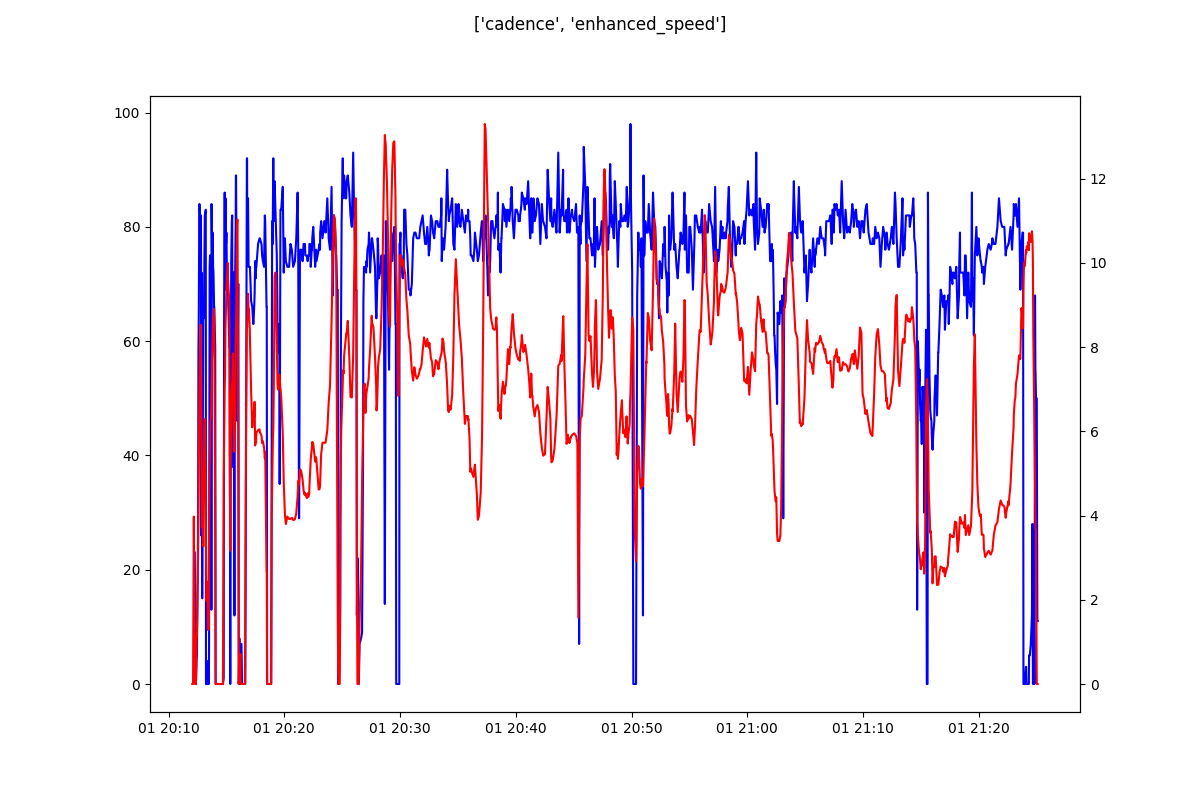

In [31]:
# Now let's just look at one example of two columns of data, say cadence versus
# speed
plot_data(["cadence","enhanced_speed"])

Ok, it's pretty messy, but we can see that there is on moment out down around time 21:05 where cadence and speed did drop together. But let's get to the interactive part.

In [33]:
# To make this interactive we can "wrap" this function with the @interact() decorator.
# A decorator in python is just a function which wraps another function, and the ipython
# team has written this one for us, it allows us to provide a new SelectMultiple widget
# and use whatever is selected there as a parameter to plot_data. We set this up by
# putting the decorator in front of the plot_data function definition, so I'm going to do
# a little copy and paste here.

# The SelectMultiple widget has three parameters, the set of options which are legal
# (so this will be our potential column names) the values we want passed in (and time
# will always be our first value we want passed in, followed by whatever other values
# are selected), and some descriptive string.
@interact(col_names=widgets.SelectMultiple(
    options=potential_columns,
    value=(potential_columns[0],),
    description='Columns'))
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])
    plt.show()



interactive(children=(SelectMultiple(description='Columns', index=(0,), options=('cadence', 'distance', 'enhan…

Nice! Now we can explore and look at any two columns we might want. Of course, SPLOMs do give us some of this with small multiples, so you shouldn't discount that. But sometimes a dashboard can engage your reader in a different way, and let them see a slightly larger view of the data.

In [34]:
# Lets look at one more example. Here I'm going to use a widget called an IntRangeSlider
# which allows the reader to set a lower and upper bounds for something. I've written a
# lot here and you can check the docs for more, but in this case I'm going to look at a
# plot of my heart rate, where the reader gets to see all places between 80 and 100 but
# can change this to filter based on values they are interested in. I'm also going to
# create a text widget that allows them to set the start and end time, so you can zoom
# in on a time of interest.
@interact(heart_rate_bounds=widgets.IntRangeSlider(
    value=[80, 100],
    min=0,
    max=180,
    step=1,
    description='HR Range:',
    continuous_update=False,
    readout_format='d',),
    start=widgets.Text(
    value=str(df.index[0]),
    description='Start Time:'),
    end=widgets.Text(
    value=str(df.index[-1]),
    description='End Time:'))

def plot_hr(heart_rate_bounds, start, end):
    plt.figure(figsize=[12,8])
    
    plt.xlim(left=df.index[0],right=df.index[-1])
    plt.ylim(0,max(df["heart_rate"]))
    
    ndf=df[(df["heart_rate"]>heart_rate_bounds[0]) & 
           (df["heart_rate"]<heart_rate_bounds[1]) & 
           (df.index>start) & (df.index<end)]
    plt.scatter(ndf.index,ndf["heart_rate"])
    plt.show()

interactive(children=(IntRangeSlider(value=(80, 100), continuous_update=False, description='HR Range:', max=18…

Ok, that was a pretty whirwind demo of Juptyer widgets. The ecosystem for widgets is far from finished, but functionality is being added all of the time. I wanted to include this here because it's starting to get a bit more mature, and honestly, it's visuals like plots and charts that people want to use these widgets for. I hope you'll take a look and poke around with what is available, and maybe share your findings and creations with myself and the other students in the class.

# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
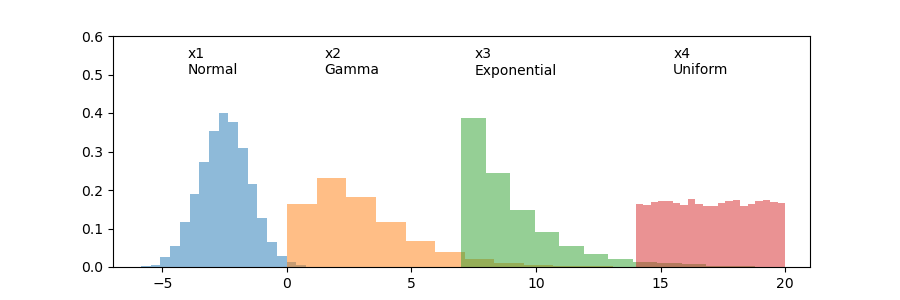

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

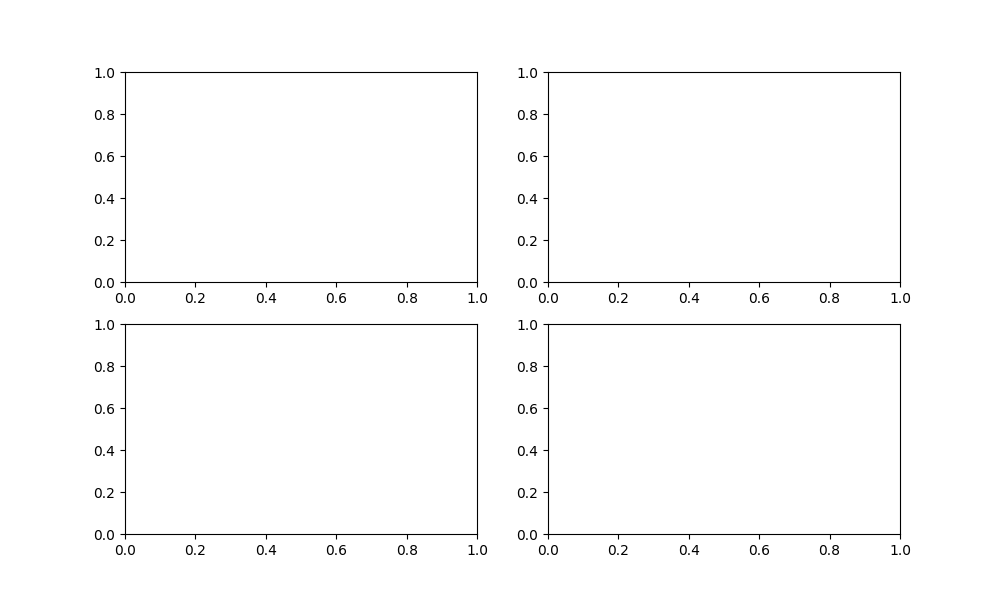

In [209]:
def update(frame):
    
    if frame == 20: 
        a.event_source.stop()
        
    sample = frame*100
    bins = [10, 20, 30, 40, 50]

    plt.subplot(2,2,1)
    plt.cla()
    plt.hist(d_normal[:sample], bins=bins[frame//5], alpha=0.5, color='blue', density=True);
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,2)
    plt.cla()
    plt.hist(d_gamma[:sample], bins=bins[frame//5], alpha=0.5, color='green', density=True);
    plt.gca().set_title('Sampling the Gamm Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,3)
    plt.cla()
    plt.hist(d_exp[:sample], bins=bins[frame//5], alpha=0.5, color='orange', density=True);
    plt.gca().set_title('Sampling the Exponential Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,4)
    plt.cla()
    plt.hist(d_unif[:sample], bins=bins[frame//5], alpha=0.5, color='red', density=True);
    plt.gca().set_title('Sampling the Uniform Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    
    plt.suptitle('Distributions (n sample = {})'.format(sample), fontsize=20)
    plt.tight_layout()

    
d_normal = np.random.normal(0, 2, 2000)
d_gamma = np.random.gamma(2, 1.5, 2000)
d_exp = np.random.exponential(2, 2000)
d_unif = np.random.uniform(0,10, 2000)

plt.subplots(2,2, figsize=(10,6), sharex=False, sharey=False)  
    
# Quick to start
a = animation.FuncAnimation(plt.gcf(), update, interval=100)

# Now tell the widget back end it's time to show!
plt.show()